# `Fase 2 --> Visualización`

In [3]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# -----------------------------------------------------------------------------
from scipy.stats import chi2_contingency, ttest_ind, shapiro, kstest, poisson, chisquare, expon

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv('DF_DATA#3.csv')
df.sample(10)

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month
361640,549858,2018,October,4,4,8,2336,233.00,0,0,Canada,Ontario,Toronto,M8Y 4K8,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2012,12
204320,238342,2018,January,0,0,0,0,0.00,0,0,Canada,British Columbia,Kelowna,V09 2E9,Male,College,73479.0,Single,Star,2179.43,2018 Promotion,2018,2
13105,800196,2017,January,0,0,0,0,0.00,0,0,Canada,Manitoba,Winnipeg,R3R 3T4,Male,Bachelor,74457.0,Married,Nova,21892.94,Standard,2018,11
308553,414382,2018,July,0,0,0,0,0.00,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,82198.0,Married,Star,3776.67,Standard,2018,9
361005,515298,2018,October,0,0,0,0,0.00,0,0,Canada,Ontario,Ottawa,K1G 4Z0,Male,College,73479.0,Single,Nova,4014.92,Standard,2012,5
272851,441724,2018,June,1,1,2,2242,224.00,812,65,Canada,Ontario,Toronto,M2M 6J7,Male,Bachelor,82250.0,Single,Star,4502.68,Standard,2012,12
323255,299210,2018,August,1,1,2,3064,306.00,0,0,Canada,Alberta,Banff,T4V 1D4,Male,College,73479.0,Married,Star,8197.20,Standard,2012,8
385597,929913,2018,November,0,0,0,0,0.00,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,78679.0,Single,Aurora,12687.15,Standard,2016,11
142510,429460,2017,August,11,9,20,2180,218.00,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73479.0,Single,Star,3839.75,Standard,2014,7
245744,793126,2018,February,9,0,9,2628,282.96,0,0,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,68389.0,Married,Star,7996.01,2018 Promotion,2018,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  object 
 3   Flights_Booked               403760 non-null  int64  
 4   Flights_with_Companions      403760 non-null  int64  
 5   Total_Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points_Accumulated           403760 non-null  float64
 8   Points_Redeemed              403760 non-null  int64  
 9   Dollar_Cost_Points_Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

### --> Contestando a las preguntas y sacando las conclusiones del análisis de forma visual!

1. ¿Cómo se distribuye la cantidad de vuelos reservados por
mes durante el año?

In [7]:
flights = df.groupby('Month')['Flights_Booked'].sum().reset_index()
flights.sort_values(by ='Flights_Booked', ascending=False)

,Month,Flights_Booked
5,July,193431
6,June,173242
1,August,169204
2,December,166047
8,May,142170
11,September,136379
7,March,131199
10,October,129461
9,November,122250
0,April,112511


In [9]:
fliyears = df.groupby('Year')['Flights_Booked'].sum().reset_index()
fliyears

,Year,Flights_Booked
0,2017,787410
1,2018,881754


In [10]:
# Definir el orden de los meses
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Supongamos que df es tu DataFrame original
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Agrupar por 'Year' y 'Month' y sumar 'Flights_Booked'
flight_years = df.groupby(['Year', 'Month'])['Flights_Booked'].sum().reset_index()

# Ordenar los datos por 'Year' y 'Month'
flight_years = flight_years.sort_values(by=['Year', 'Month'])

print(flight_years)



    Year      Month  Flights_Booked
0   2017    January           47766
1   2017   February           47691
2   2017      March           64271
3   2017      April           55720
4   2017        May           65279
5   2017       June           80493
6   2017       July           89288
7   2017     August           78692
8   2017  September           63304
9   2017    October           60351
10  2017   November           56905
11  2017   December           77650
12  2018    January           49170
13  2018   February           48643
14  2018      March           66928
15  2018      April           56791
16  2018        May           76891
17  2018       June           92749
18  2018       July          104143
19  2018     August           90512
20  2018  September           73075
21  2018    October           69110
22  2018   November           65345
23  2018   December           88397


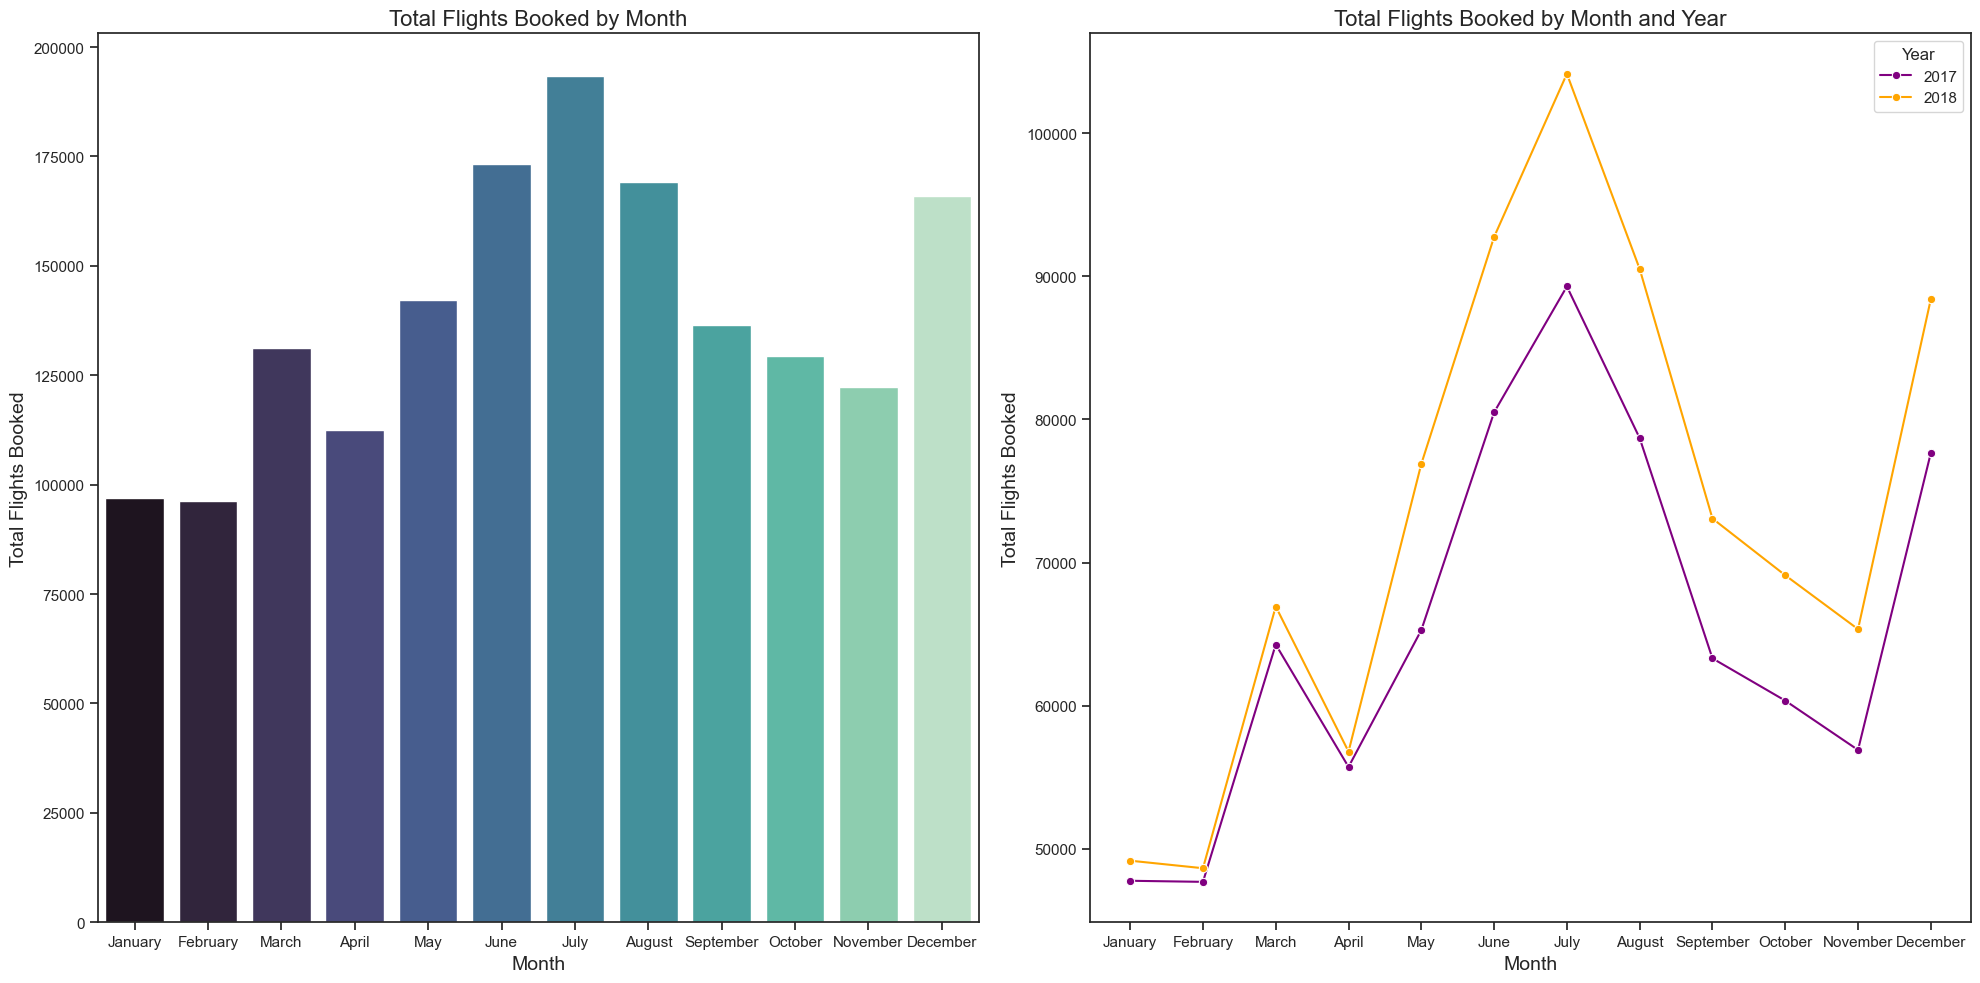

In [224]:
# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Definir el orden de los meses
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Crear el gráfico de barras
sns.barplot(x='Month', y='Flights_Booked', data=flights, palette='mako', order=month_order, ax=axes[0])

axes[0].set_title('Total Flights Booked by Month', fontsize=16)
axes[0].set_xlabel('Month', fontsize=14)
axes[0].set_ylabel('Total Flights Booked', fontsize=14)
# Configurar las etiquetas de los meses
axes[0].set_xticks(range(12))

# Crear el gráfico de líneas
sns.lineplot(x='Month', y='Flights_Booked', hue='Year', data=flight_years, marker='o', palette={2017: 'purple', 2018: 'orange'}, ax=axes[1])

axes[1].set_title('Total Flights Booked by Month and Year', fontsize=16)
axes[1].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('Total Flights Booked', fontsize=14)
# Configurar las etiquetas de los meses
axes[1].set_xticks(range(12))

# Ajustar el diseño para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


2. ¿Existe una relación entre la distancia de los vuelos y los
puntos acumulados por los clientes?


In [12]:
point_distance = df.groupby(['Loyalty_Number', 'Points_Accumulated'])['Distance'].sum().reset_index()
point_distance.sort_values(by ='Points_Accumulated')


,Loyalty_Number,Points_Accumulated,Distance
0,100018,0.0,0
53321,318537,0.0,0
53320,318291,0.0,0
184226,845319,0.0,0
53309,318285,0.0,0
...,...,...,...
53294,318199,666.0,4448
139008,663270,667.5,4452
24482,200519,675.0,4505
42443,274264,675.0,4505


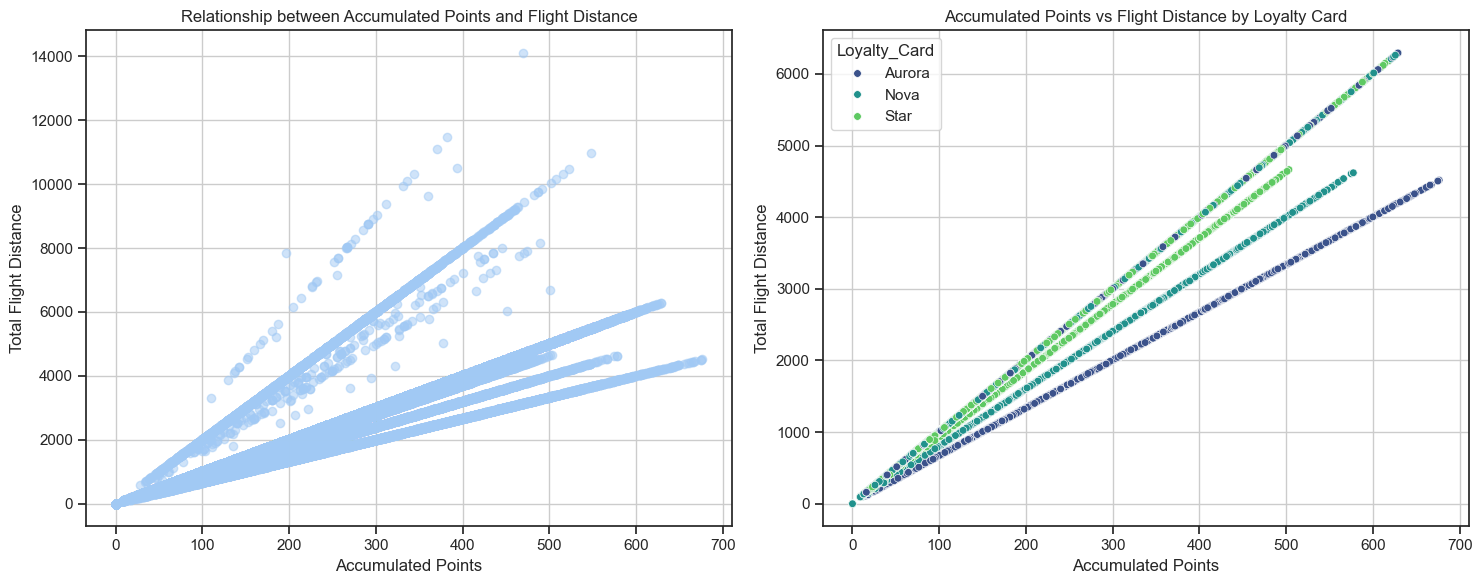

In [150]:
# Asegurarse de que las columnas estén en el tipo de datos correcto
df['Points_Accumulated'] = pd.to_numeric(df['Points_Accumulated'])
df['Distance'] = pd.to_numeric(df['Distance'])
df['Loyalty_Card'] = df['Loyalty_Card'].astype('category')

# Crear un layout de subplots 1 fila, 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graficar diagrama de dispersión en el primer subplot
axes[0].scatter(point_distance['Points_Accumulated'], point_distance['Distance'], alpha=0.5)
axes[0].set_title('Relationship between Accumulated Points and Flight Distance')
axes[0].set_xlabel('Accumulated Points')
axes[0].set_ylabel('Total Flight Distance')
axes[0].grid(True)

# Graficar sns.lmplot en el segundo subplot
sns.scatterplot(x='Points_Accumulated', y='Distance', hue='Loyalty_Card', data=df,
           markers="o", palette="viridis", s=30, ax=axes[1])

axes[1].set_title('Accumulated Points vs Flight Distance by Loyalty Card')
axes[1].set_xlabel('Accumulated Points')
axes[1].set_ylabel('Total Flight Distance')
axes[1].grid(True)

plt.tight_layout()
plt.show()



3. ¿Cuál es la distribución de los clientes por provincia o
estado?


In [44]:
provin_customer = df.groupby(['Province'])['Loyalty_Number'].count().reset_index()
provin_customer.sort_values(by ='Province')

,Province,Loyalty_Number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


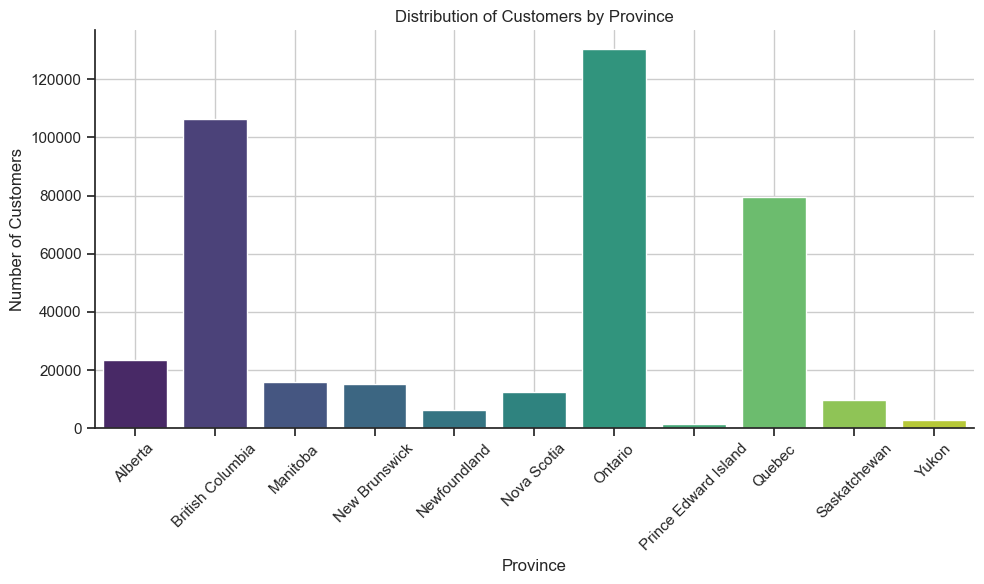

In [148]:
# Visualización de la distribución de clientes por provincia
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Loyalty_Number', data=provin_customer, palette='viridis')

plt.title('Distribution of Customers by Province')
plt.xlabel('Province')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Ajustar el diseño para que las etiquetas no se solapen
plt.tight_layout()
# Mostrar la gráfica
plt.show()


4. ¿Cómo se compara el salario promedio entre los diferentes
niveles educativos de los clientes?


In [60]:
salary_mean = df.groupby(['Education'])['Salary'].mean().reset_index()
salary_mean.sort_values(by='Salary', ascending=False).round(2)

,Education,Salary
2,Doctor,178403.68
4,Master,103734.52
1,College,73479.00
0,Bachelor,72599.08
3,High School or Below,61146.38


In [75]:
salary_mean_gender = df.groupby(['Education', 'Gender'])['Salary'].mean().reset_index()
salary_mean_gender.sort_values(by='Salary', ascending=False).round(2)

,Education,Gender,Salary
5,Doctor,Male,181276.44
4,Doctor,Female,175594.68
9,Master,Male,105036.54
8,Master,Female,102549.31
2,College,Female,73479.00
3,College,Male,73479.00
0,Bachelor,Female,72757.82
1,Bachelor,Male,72437.76
6,High School or Below,Female,61237.59
7,High School or Below,Male,61050.45


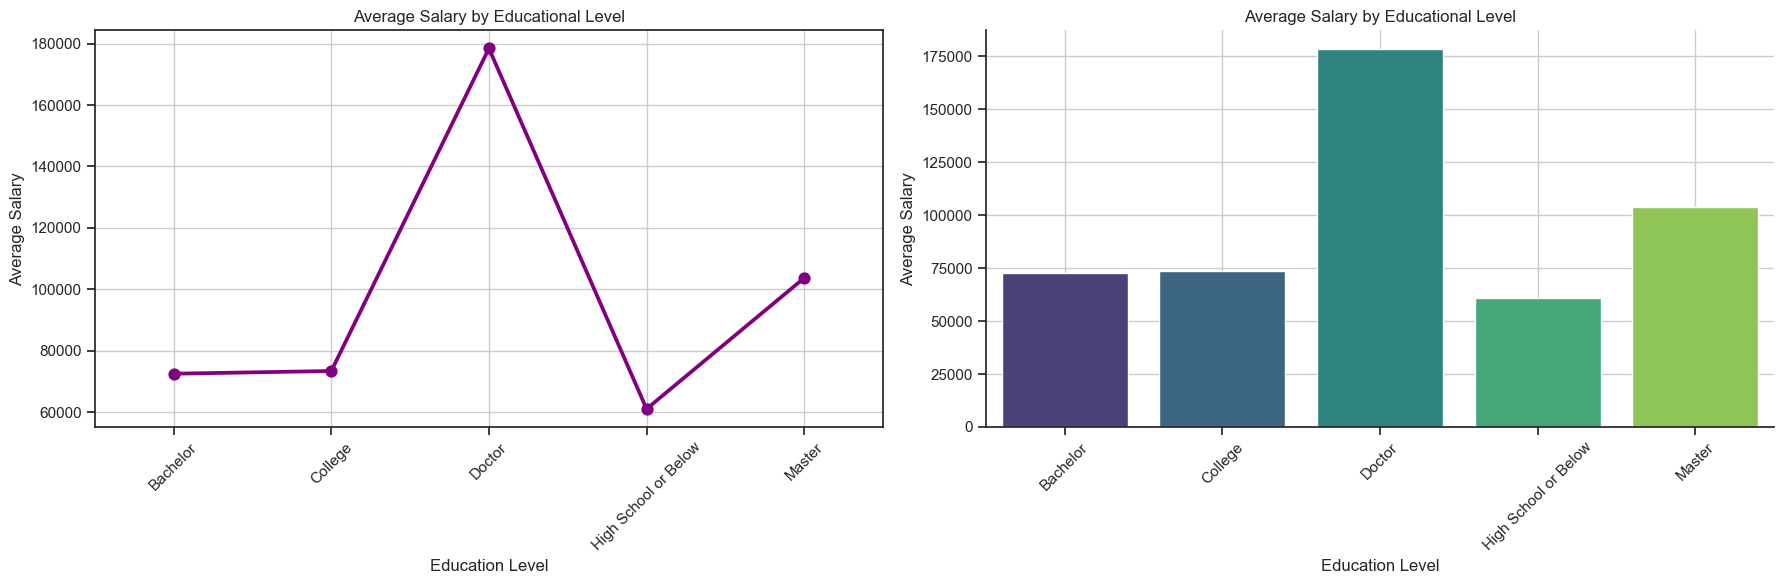

_______By Gender_____


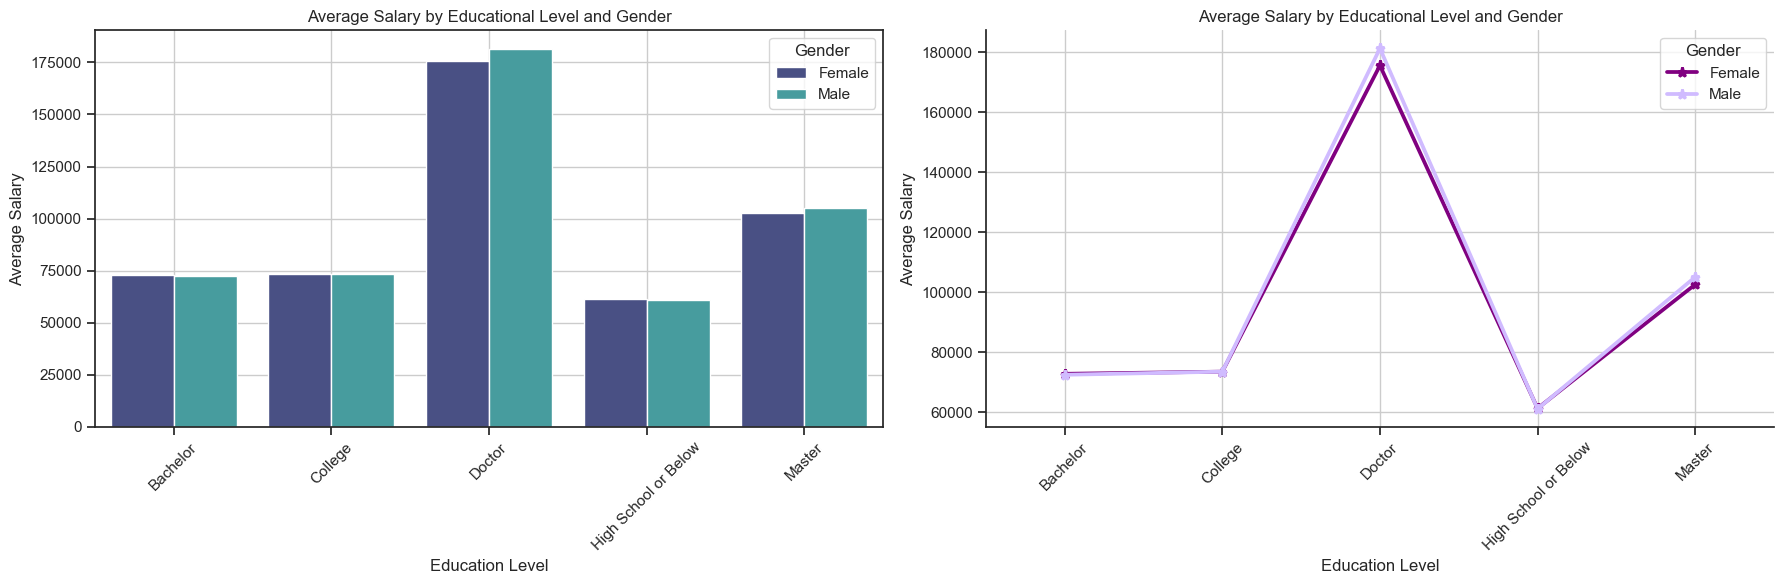

In [229]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Pointplot
sns.pointplot(x='Education', y='Salary', data=salary_mean, color='purple', order=salary_mean['Education'], ci=None, ax=axes[0])
axes[0].set_title('Average Salary by Educational Level')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Average Salary')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Gráfico 2: Barplot
sns.barplot(x='Education', y='Salary', data=salary_mean, palette='viridis', ax=axes[1])
axes[1].set_title('Average Salary by Educational Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Average Salary')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

print('_______By Gender_____')

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Barplot agrupado por género
sns.barplot(x='Education', y='Salary', hue='Gender', data=salary_mean_gender, palette='mako', ax=axes[0])
axes[0].set_title('Average Salary by Educational Level and Gender')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Average Salary')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Gender')
axes[0].grid(True)

# Gráfico 2: Pointplot agrupado por género
sns.pointplot(x='Education', y='Salary', hue='Gender', data=salary_mean_gender, marker='*', palette={'Male': 'm', 'Female': 'purple'}, ax=axes[1])
axes[1].set_title('Average Salary by Educational Level and Gender')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Average Salary')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Gender')
axes[1].grid(True)


# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()



5. ¿Cuál es la proporción de clientes con diferentes tipos de
tarjetas de fidelidad?


In [91]:
customer_cad = df.groupby(['Loyalty_Card'])['Loyalty_Number'].count().reset_index()
customer_cad.sort_values(by='Loyalty_Card', ascending=False)


,Loyalty_Card,Loyalty_Number
2,Star,183745
1,Nova,136883
0,Aurora,83132


In [96]:
customer_card_gender = df.groupby(['Loyalty_Card', 'Gender'])['Loyalty_Number'].count().reset_index()
customer_card_gender.sort_values(by='Loyalty_Card', ascending=False)

,Loyalty_Card,Gender,Loyalty_Number
4,Star,Female,91630
5,Star,Male,92115
2,Nova,Female,69677
3,Nova,Male,67206
0,Aurora,Female,41450
1,Aurora,Male,41682


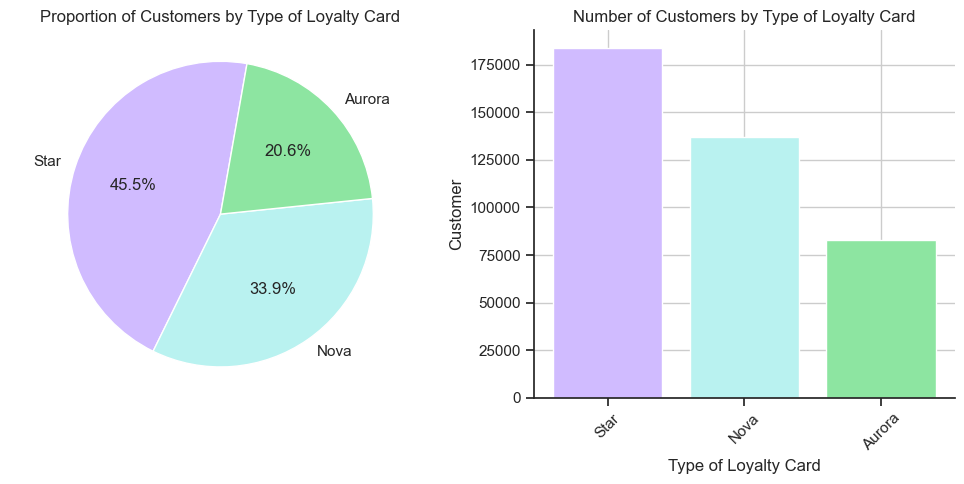

In [171]:
# Configurar los datos para el gráfico de pie
labels = customer_cad['Loyalty_Card']
sizes = customer_cad['Loyalty_Number']

# Crear la figura y los ejes para 1 fila y 2 columnas
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear el gráfico de pie en el primer eje
ax[0].pie(sizes, labels=labels, colors=['m', 'c', 'g'], autopct='%1.1f%%', startangle=80)
ax[0].set_title('Proportion of Customers by Type of Loyalty Card')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Crear el gráfico de barras en el segundo eje
colors = ['m', 'c', 'g']
ax[1].bar(customer_cad['Loyalty_Card'], customer_cad['Loyalty_Number'], color=colors)
ax[1].set_xlabel('Type of Loyalty Card')
ax[1].set_ylabel('Customer')
ax[1].set_title('Number of Customers by Type of Loyalty Card')
ax[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x si es necesario
ax[1].grid(True)

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Ajustar el diseño para que no se solapen las etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


6. ¿Cómo se distribuyen los clientes según su estado civil y
género?

In [204]:
df_marital = df.groupby(["Marital_Status", "Gender"])["Loyalty_Number"].count().reset_index()
df_marital

,Marital_Status,Gender,Loyalty_Number
0,Divorced,Female,30634
1,Divorced,Male,30128
2,Married,Female,117363
3,Married,Male,117482
4,Single,Female,54760
5,Single,Male,53393


In [203]:
df_marital1 = df.groupby("Marital_Status")["Loyalty_Number"].count().reset_index()
df_marital1

,Marital_Status,Loyalty_Number
0,Divorced,60762
1,Married,234845
2,Single,108153


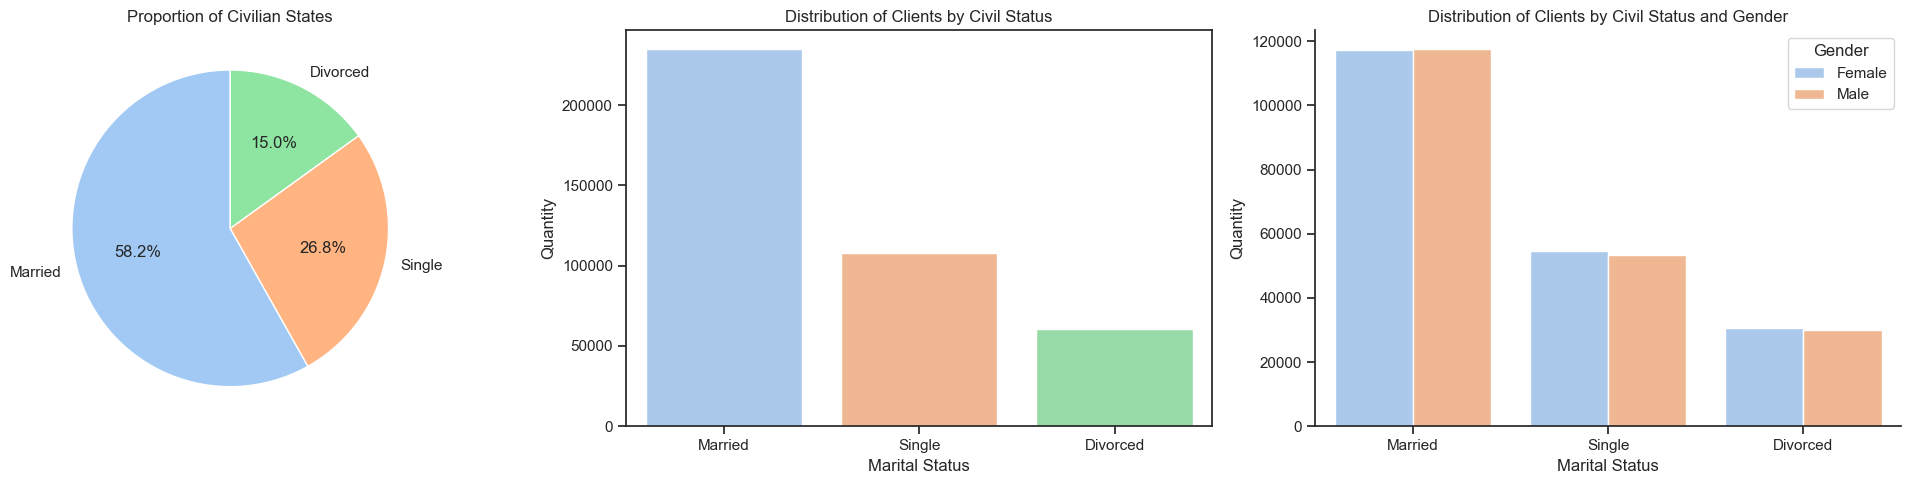

In [215]:
# Configurar los datos para el gráfico de pie
marital_status_counts = df['Marital_Status'].value_counts().reset_index()
marital_status_counts.columns = ['Marital_Status', 'Count']

# Crear la figura y los ejes para 1 fila y 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Crear el gráfico de pie en el primer eje
axes[0].pie(marital_status_counts['Count'], labels=marital_status_counts['Marital_Status'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(marital_status_counts)))
axes[0].set_title('Proportion of Civilian States')

# Crear el gráfico de conteo en el segundo eje
sns.countplot(x="Marital_Status", data=df, palette="pastel", ax=axes[1])
axes[1].set_title('Distribution of Clients by Civil Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Quantity')

# Agrupar los datos por estado civil y género
df_marital_gender = df.groupby(['Marital_Status', 'Gender']).size().reset_index(name='Count')

# Crear el gráfico de conteo desglosado por género en el tercer eje
sns.countplot(x='Marital_Status', hue='Gender', data=df, palette='pastel', ax=axes[2])
axes[2].set_title('Distribution of Clients by Civil Status and Gender')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Quantity')
axes[2].legend(title='Gender')

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Ajustar el diseño para que no se solapen las etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()
